In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch7/data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [8]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

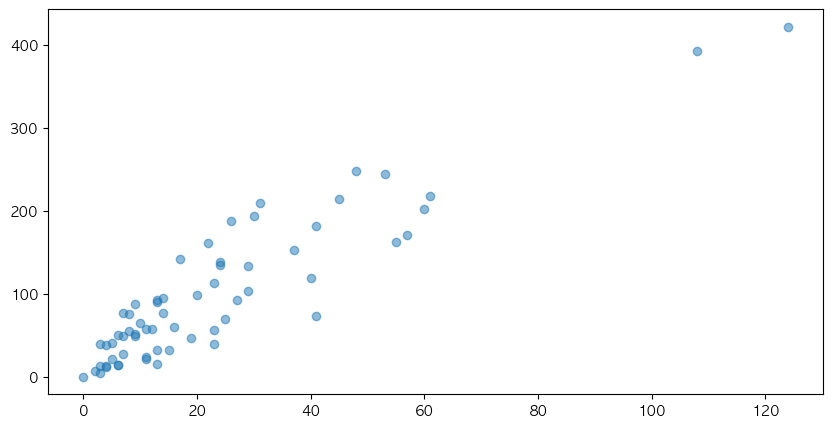

In [6]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y,'o',alpha=0.5)

In [9]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [10]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [11]:
X = np.concatenate((np.ones((len(raw_X),1)),raw_X), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [12]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([2.136367 , 1.2536816])

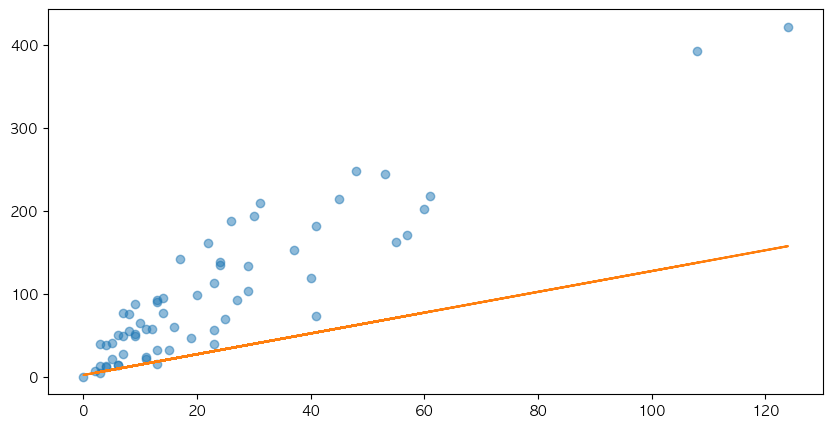

In [13]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)

## HYPOTHESIS AND COST FUNCTION

In [14]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [15]:
h = hypothesis_function(X,w)

In [16]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [17]:
h = hypothesis_function(X,w)
cost_function(h, y)

4144.495644519582

## GRADIENT DESCENT

In [18]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        # 좋은 코드는 아님, 한번에 하는 방법 있음
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list


## DO Linear regression with GD

In [19]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88101608  3.41627364]
cost: 625.3742200185593


In [20]:
theta_list[:10]

[[2.1363670046660013, 1.253681603788574],
 [2.2037026606094794, 3.9552453609530045],
 [2.290041430661645, 3.7961044986571166],
 [2.379322083150046, 3.794176717643473],
 [2.4681525077317805, 3.792258658118163],
 [2.55653497483344, 3.7903502710571653],
 [2.644471743432228, 3.7884515076838046],
 [2.731965061113689, 3.7865623194673788],
 [2.8190171641291566, 3.784682658121919],
 [2.905630277452911, 3.7828124756049535]]

In [22]:
theta_list = np.array(theta_list)

In [23]:
cost_list[:5]

[4144.495644519582,
 718.5523557718057,
 704.621036542677,
 703.8237612713631,
 703.0345067859405]

In [24]:
theta_list.transpose()

array([[ 2.136367  ,  2.20370266,  2.29004143, ..., 19.87934022,
        19.87992088, 19.88049861],
       [ 1.2536816 ,  3.95524536,  3.7961045 , ...,  3.41630983,
         3.41629729,  3.41628481]])

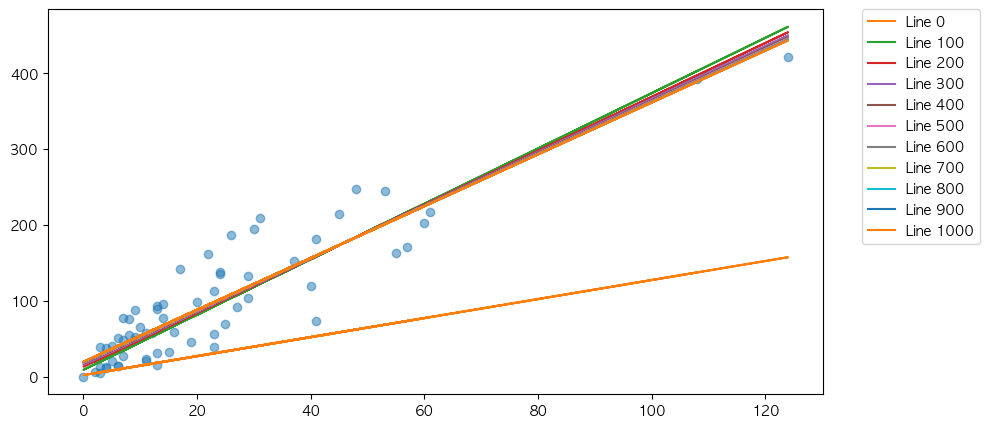

In [26]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

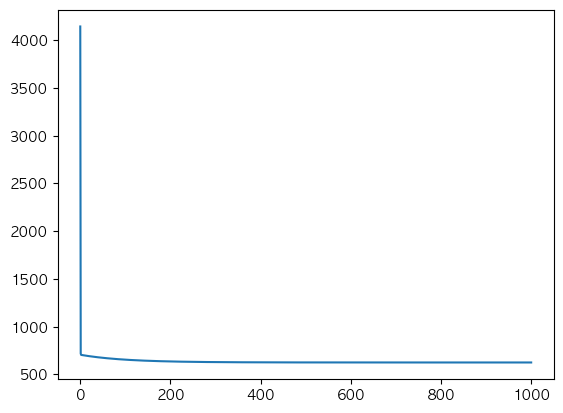

In [27]:
plt.plot(range(len(cost_list)), cost_list);

<a list of 7 text.Text objects>

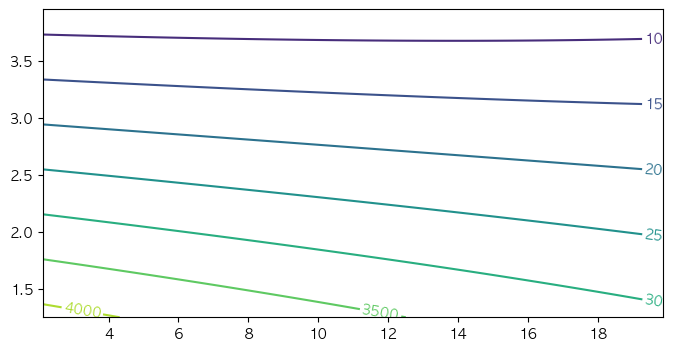

In [28]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [29]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

/var/folders/vs/d7h80pg10h31n7bq9nk3bhxc0000gn/T/ipykernel_53350/2907565628.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


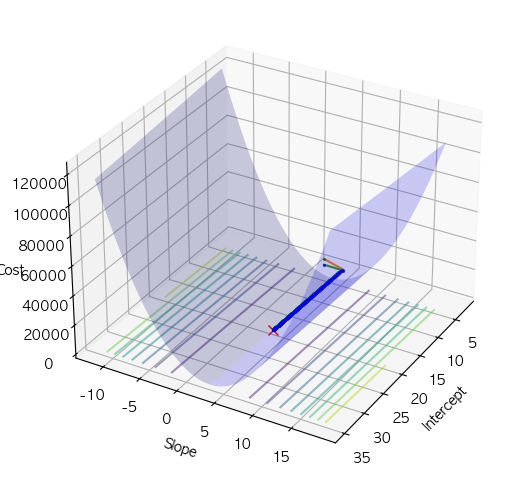

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);